### Intro

Here is Conor and Will's computational project. The system we are investigating is a harmonograph ($\href{https://youtu.be/HJYvc-ISrf8?si=28UPteGFD0hYIdjX}{\text{Check This Out}}$). The system distills into two coupled pendulums and a third uncoupled one.

Here is our non dimensional Lagrangian:

\begin{equation}
    L = \frac{1}{2}\rho_3\dot{\theta}^{2}_{3} + \frac{1}{2}(1+\rho_2\)\gamma^{2}dot{\theta}^{2}_{3}
\end{equation}

In [64]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

First, we need want to solve the double pendulum, because the single pendulum added onto it will be easy.
We want to solve the following system:

\begin{equation}
\begin{split}
           (1 + \rho_2)\ddot{\theta}_1 + \rho_2\gamma_2\cos(\theta_2 - \theta_1)\ddot{\theta}_2 - \rho_2\gamma_2\sin(\theta_2 - \theta_1)\dot{\theta}_2 = - (1+\rho_2)\sin(\theta_1)   // 
           \gamma_2\ddot{\theta}_2 + \ddot{\theta}
\end{split}
\end{equation}

In [5]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the double pendulum.

    ***could modify to include the single one too!!!


    ***basically all comments are wrong!!!!!**********

    Arguments:
        w :  vector of the state variables:
                  w0 = [θ1, x1, θ2, x2, θ3, x3]
        t :  time
        p :  vector of the parameters:
                  p = [p2, g2, g3]
    """
    θ1, x1, θ2, x2, θ3, x3 = w
    p2, g2, g3 = p

    # Create f = (θ1',x1',θ2',x2',θ3',x3'):
    f = [x1,
         (p2*g2*x2**2*np.sin(θ2-θ1)+x1**2*np.sin(2*(θ2-θ1))/2+p2*np.sin(θ2)*np.cos(θ2-θ1)-np.sin(θ1)) / (1-p2*np.cos(θ2-θ1)**2),
         x2,
         (x1**2*np.sin(θ2-θ1)+p2*g2*x2**2*np.sin(2*(θ2-θ1))/2-np.sin(θ1)*np.cos(θ2-θ1)+np.sin(θ2)) / (p2*g2*np.cos(θ2-θ1)**2-g2),
         x3,
         -np.sin(θ3)/g3]
    return f

In [40]:
def sim(ICsArray, paramArray, stoptime=10.0, numpoints=250):
    # Use ODEINT to solve the differential equations defined by the vector field
    """
    input format:
    paramArray = [p2, g2, g3]
    p2 = "p2"/(1+"p2"); "p2" = m2/m1; g2=l2/l1; g3=l3/l1
    
    ICsArray = [θ1, x1, θ2, x2, θ3, x3]
    θ_ are the initial angles; x_ are the initial nondiminsionalized angular velocities
    """
    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6
    
    # Create the time samples for the output of the ODE solver.
    # I use a large number of points, only because I want to make
    # a plot of the solution that looks nice.
    t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

    # Call the ODE solver.
    wsol = odeint(vectorfield, ICsArray, t, args=(paramArray,), atol=abserr, rtol=relerr)
    return wsol, t

In [41]:
#makes a simple plot of wsol and t
def simplPlot(wsol, t):
    θ1 = wsol[:,0]
    x1 = wsol[:,1]
    θ2 = wsol[:,2]
    x2 = wsol[:,3]
    θ3 = wsol[:,4]
    x3 = wsol[:,5]
    
    lw = 1
    
    [fig, ax] = plt.subplots(1)
    
    ax.plot(t, θ1, 'b', linewidth=lw)
    ax.plot(t, θ2, 'g', linewidth=lw)
    ax.plot(t, θ3, 'r', linewidth=lw)
    
    ax.set_title('θ1, θ2, θ3 vs tau');
    
    fig.legend((r'$θ_1$', r'$θ_2$', r'$θ_3$'));

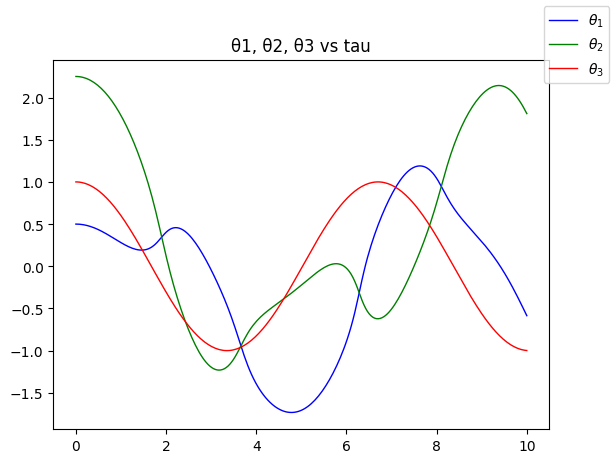

In [42]:
wsol, t = sim([.5,0,2.25,0,1,0], [.5,1,1])
simplPlot(wsol, t)

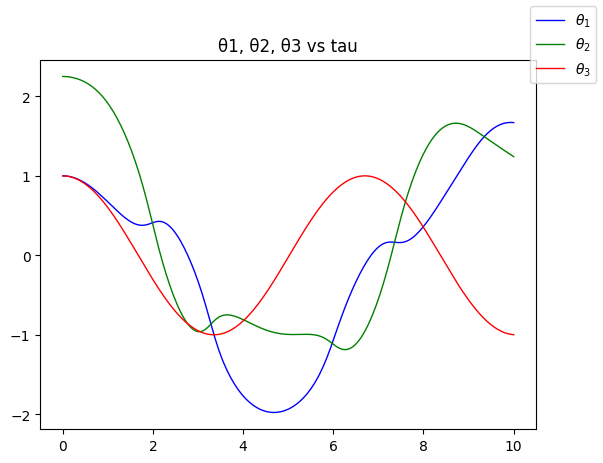

In [43]:
wsol, t = sim([1,0,2.25,0,1,0], [.5,1,1])
simplPlot(wsol, t)

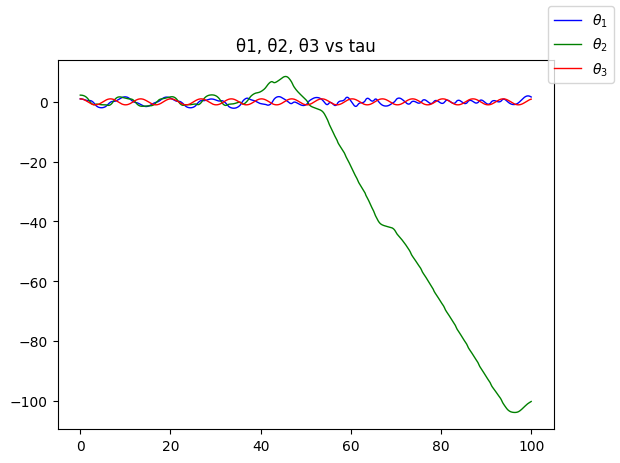

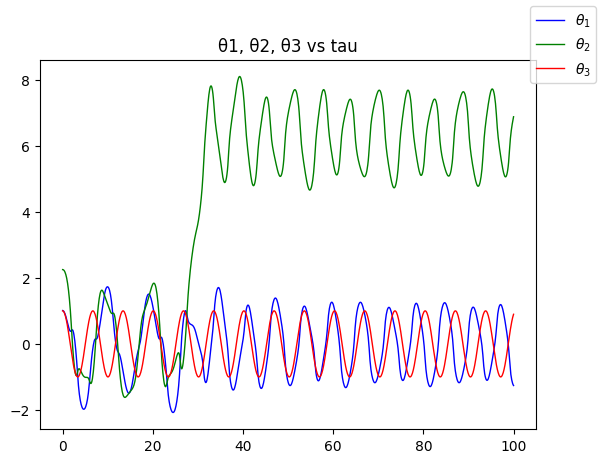

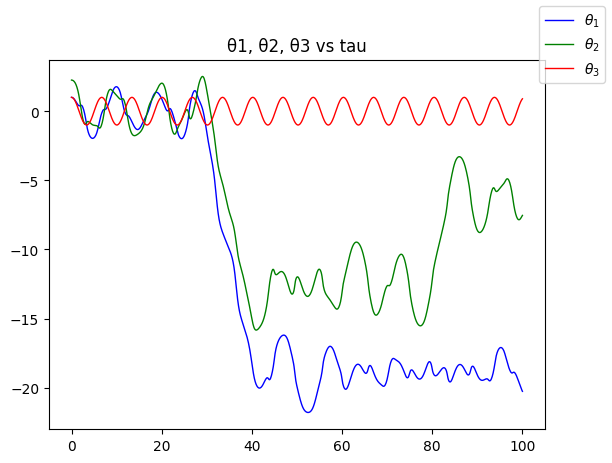

In [62]:
#demonstration of chaos
wsol, t = sim([1,0,2.25,0,1,0], [.5,1,1], stoptime=100.0, numpoints=1000)
simplPlot(wsol, t)
wsol, t = sim([1.01,0,2.25,0,1,0], [.5,1,1], stoptime=100.0, numpoints=1000)
simplPlot(wsol, t)
wsol, t = sim([1.0,0.01,2.25,0,1,0], [.5,1,1], stoptime=100.0, numpoints=1000)
simplPlot(wsol, t)

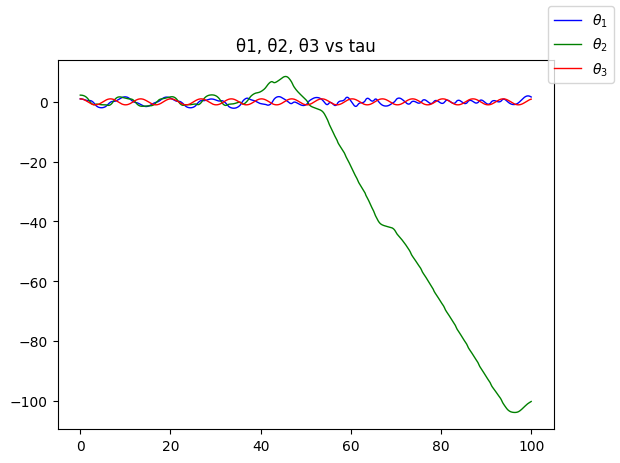

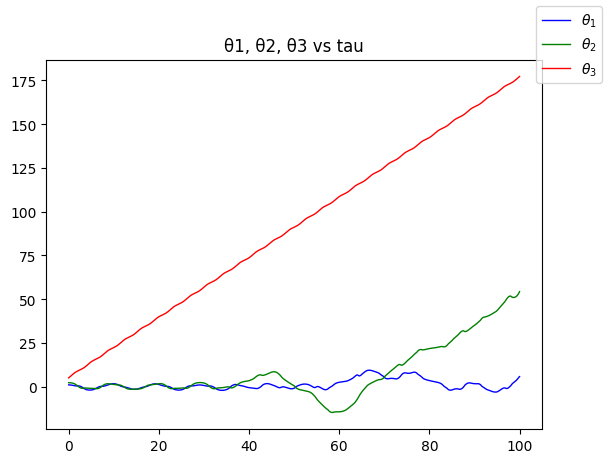

In [63]:
#note that the stuff from theta3 does have an effect on theta 1 and 2, but I'm
#pretty sure that this is just because of numerical error in the DE solver,
#since these very different conditions for theta 3 only show divergence in theta1
#and theta2 after like tau=50, which is comparable/even higher than how long it
#takes when I add a miniscule amt. to the theta1 or theta2 ICs.
wsol, t = sim([1,0,2.25,0,1,0], [.5,1,1], stoptime=100.0, numpoints=1000)
simplPlot(wsol, t)
wsol, t = sim([1,0,2.25,0,5,2], [.5,1,1], stoptime=100.0, numpoints=1000)
simplPlot(wsol, t)

In [ ]:
#Plan is to use FuncAnimation to make the animation; will need to have some lines for the rods and some dots
#for the masses. Would do a side-by-side of the double pendulum and the single pendulum, first.

#once that works, would add an animation showing the drawing it would produce, perhaps side-by-side
#at the same time


